# TP 2: Résolution d'équations non linéaires
## PHY-3500: Physique numérique (H2021) - 26 février 2021


Mélissa Cinq-Mars (111 179 946)

Pierre-Olivier Janvier (111 187 987)

Maxence Larose (111 188 447)

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym

## Le potentiel de Lennard-Jones

### Question 1

On cherche à exprimer les points de rebroussement en fonction de l'énergie $\epsilon_n$. On sait qu'il existe deux points de rebroussement, notés $r_-$ et $r_+$, et qu'ils correspondent aux positions où l'impulsion est nulle (positions où les noyaux changent de direction). L'impulsion linéaire local $p(r)$ est donnée par

$$ p(r)=\pm\left[2 \mu(E_n - V(r))\right]^{1 / 2}. $$

En utilisant les variables sans dimension suivantes

$$ \epsilon_n = \frac{E_n}{V_{0}} \quad, \quad x=\frac{r}{\sigma} \quad, \quad \gamma=\left(\frac{2 \mu \sigma^{2} V_{0}}{\hbar^{2}}\right)^{1 / 2}, $$

il est possible d'écrire l'impulsion linéaire local sous la forme

$$ p(x)=\pm\left[2 \mu V_0 (\epsilon_n - v(x))\right]^{1 / 2}, $$

où on a

$$ v(x)=4\left[\left(\frac{1}{x}\right)^{12}-\left(\frac{1}{x}\right)^{6}\right]. $$

Les points de rebroussement $x_-$ et $x_+$ sont donc déterminés par l'équation $ p(x) = 0 $, soit

$$
p(x) = \pm\left[2 \mu V_0 \left(\epsilon_n - 4\left[\left(\frac{1}{x}\right)^{12}-\left(\frac{1}{x}\right)^{6}\right]\right)\right]^{1 / 2} = 0, \\
\implies \epsilon_n = 4\left[\left(\frac{1}{x}\right)^{12}-\left(\frac{1}{x}\right)^{6}\right], \\
\implies \frac{\epsilon_n}{4}x^{12}  + x^6 - 1 = 0. \\
$$

En utilisant la substitution $y = x^6$, on a que

$$
\frac{\epsilon_n}{4}y^{2}  + y - 1 = 0,
$$

ce qui nous donne les solutions suivantes en utilisant la formule quadratique :

$$
y = \frac{2\left((\epsilon_n + 1)^{1/2} - 1\right)}{\epsilon_n} \quad \text{et} \\
y = -\frac{2\left((\epsilon_n + 1)^{1/2} + 1\right)}{\epsilon_n},
$$

avec $\epsilon_n \neq 0$. Si $\epsilon_n = 0$, on a que $y = 1$, mais le cas $\epsilon_n = 0$ n'est pas intéressant puisqu'il signifie que l'énergie $E = 0$. En revenant à une solution avec $x$, on a que

$$
x_- = \left[\frac{2\left((\epsilon_n + 1)^{1/2} - 1\right)}{\epsilon_n}\right]^{1/6} \quad \text{et} \\
x_+ = \left[-\frac{2\left((\epsilon_n + 1)^{1/2} + 1\right)}{\epsilon_n}\right]^{1/6}.
$$

Il est important de noter que l'on désire obtenir des solutions réelles et positives pour les valeurs de $x_-$ et $x_+$ et on ne considère donc pas les racines complexes. On doit s'assurer que notre choix de $x_-$ et $x_+$ fait en sorte que $x_+ > x_-$. Pour ce faire, on doit d'abord déterminer le domaine de la valeur de $\epsilon_n$, soit si $\epsilon_n$ est un nombre positif ou négatif dans notre problème. On remarque que le point de rebroussement $x_+$ est un nombre réel pour $\epsilon_n < 0$ et un nombre complexe pour $\epsilon_n > 0$. On se doute donc que $\epsilon_n$ doit être négatif. Comme confirmation, on peut observer la courbe du potentiel réalisée par le bloc de code suivant.

In [2]:
def get_dimensionless_potential(x):
    return 4*(x**-12 - x**-6)

def show_dimensionless_potential():
    x = np.linspace(0.93, 2, 1000)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    line, = ax.plot(x, get_dimensionless_potential(x), color='k', lw=2)
    ax.set_title("Potentiel adimensionnel de Lennard-Jones", fontsize=14)

    ax.set_xlabel("Position adimensionnelle $x$ [-]", fontsize=14)
    ax.set_xlim()
    ax.set_ylabel("Potentiel adimensionnel $v(x)$ [-]", fontsize=14)
    ax.minorticks_on()

    plt.grid()
    plt.show()
    plt.close(fig)

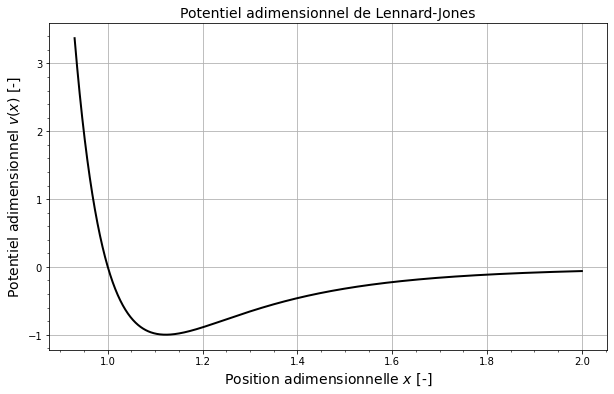

In [3]:
show_dimensionless_potential()

On remarque donc que le potentiel $v(x)$ est contraint de $[-1, 0[$ pour tout $x > 1$. Comme les points de rebroussement sont déterminés par l'équation $p(x) = 0$ donc $\epsilon_n = v(x)$, on a que 

$$ \epsilon_n \in [-1, 0[. $$

On doit maintenant s'assurer que notre choix de $x_-$ et $x_+$ fait en sorte que $x_+ > x_-$ sur ce domaine. Le bloc de code suivant permet d'observer les positions des points de rebroussement $x_-$ et $x_+$ obtenues en fonction du paramètre $\epsilon_n$.

In [4]:
def get_xmin(eps):
    return (2*((eps + 1)**(1/2) - 1)/eps)**(1/6)

def get_xmax(eps):
    return (-2*((eps + 1)**(1/2) + 1)/eps)**(1/6)

def show_turning_points():
    eps = np.linspace(-1, -0.01, 1000)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    line1, = ax.plot(eps, get_xmin(eps), color='b', lw=2, label="Point de rebroussement $x_-$")
    line2, = ax.plot(eps, get_xmax(eps), color='r', lw=2, label="Point de rebroussement $x_+$")
    ax.set_title("Position adimensionnel des points de rebroussement en fonction de l'énergie", fontsize=14)

    ax.set_xlabel("Énergie adimensionnelle $\epsilon_n$ [-]", fontsize=14)
    ax.set_xlim()
    ax.set_ylabel("Position adimensionnel $x$ [-]", fontsize=14)
    ax.minorticks_on()
    ax.legend(fontsize=14)

    plt.grid()
    plt.show()
    plt.close(fig)

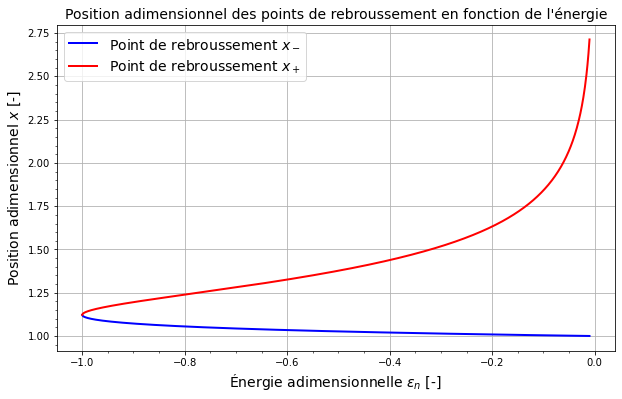

In [5]:
show_turning_points()

Notre choix de $x_-$ et $x_+$ fait bien en sorte que $x_+ > x_-$ sur le domaine de validité de $\epsilon_n$. La solution finale pour les points de rebroussement en fonction de $\epsilon_n$ est donc
$$
x_-(\epsilon_n) = \left[\frac{2\left((\epsilon_n + 1)^{1/2} - 1\right)}{\epsilon_n}\right]^{1/6} \quad \text{et} \quad x_+(\epsilon_n) = \left[-\frac{2\left((\epsilon_n + 1)^{1/2} + 1\right)}{\epsilon_n}\right]^{1/6},
$$
ou plutôt
$$
r_-(\epsilon_n) = \sigma\left[\frac{2\left((\epsilon_n + 1)^{1/2} - 1\right)}{\epsilon_n}\right]^{1/6} \quad \text{et} \quad r_+(\epsilon_n) = \sigma\left[-\frac{2\left((\epsilon_n + 1)^{1/2} + 1\right)}{\epsilon_n}\right]^{1/6}.
$$


### Question 2

In [6]:
def get_quasi_classical_action(eps, gamma, n):
    assert eps < 0 and eps > -1, r"Attention! Le domaine de validité de l'énergie adimensionnelle est [-1 < epsilon < 0]"
    
    x_min: float = get_xmin(eps)
    x_max: float = get_xmax(eps)
    
    integrand = lambda x, eps: (eps - get_dimensionless_potential(x))**(1/2)
    
    action: float = integrate.quad(func=integrand, a=x_min, b=x_max, args=(eps,))[0]
    
    return gamma*action - (n + 1/2)*np.pi




def bissection(func, eps1, eps2, gamma, n, error_target):
    
    f_eps1 = func(eps=eps1, gamma=gamma, n=n)
    f_eps2 = func(eps=eps2, gamma=gamma, n=n)
    assert f_eps1*f_eps2 <= 0, "La fonction évaluée aux deux points choisis sont de même signe"

    err = np.inf
    
    while err > error_target:
        eps_prime = 1/2*(eps1 + eps2)
        f_eps1 = func(eps=eps1, gamma=gamma, n=n)
        f_eps2 = func(eps=eps2, gamma=gamma, n=n)
        f_eps_prime = func(eps=eps_prime, gamma=gamma, n=n)
        
        if f_eps1 * f_eps_prime < 0:
            eps2 = eps_prime
            eps1 = eps1
        
        elif f_eps2 * f_eps_prime < 0:
            eps1 = eps_prime
            eps2 = eps2
            
        elif f_eps_prime == 0:
            print("Found the exact solution")
            return eps_prime
        
        else:
            return None
        
        err = abs(eps2 - eps1)
        
    return eps_prime   


### Question 3

In [7]:
gamma_O2: float = 150
nb_state: float = 20
n_states: list = list(range(nb_state))

######################################
# Bissection
######################################
# eps_1 = -0.99 
# for n in n_states: 
#     print(get_quasi_classical_action(eps=eps_1, gamma=gamma_O2, n=n))


print(bissection(get_quasi_classical_action, -0.99, -0.01, gamma_O2, nb_state, 10**-8))

    
    
    
######################################
# Bissection
######################################

-0.1252463512122631


### Question 4

## Pandémie et relaxation

### Question 5

Dans cette section, un algorithme de relaxation pour l'équation du pourcentage de la population infecté en termes
de la pandémie en fonction du nombre de reproduction de base est réalisé.

In [11]:
def pop_percentage(R0):
    """
    Calcule le pourcentage de la population infecté en termes de la pandémie.
    
    Parameters
    ----------
    R0: Nombre de reproduction de base de la pandémie. (float)
    
    Returns
    -------
    p (float), prec (float)  
    """
    p  = 0.5
    p_prev = p
    p  = 1-np.exp(-R0 * p)
    prec = abs(p-p_prev)
    
    while prec >= 0.000001:
        p_prev = p
        p  = 1-np.exp(-R0 * p)
        prec = abs(p-p_prev)
        
    return (p,prec)

Dans cette section, la fonction fait à la section précédente est utilisée afin d'évaluer la population infecté
selon plusieurs nombre de reproduction de base pour finalement en tracer un graphique.

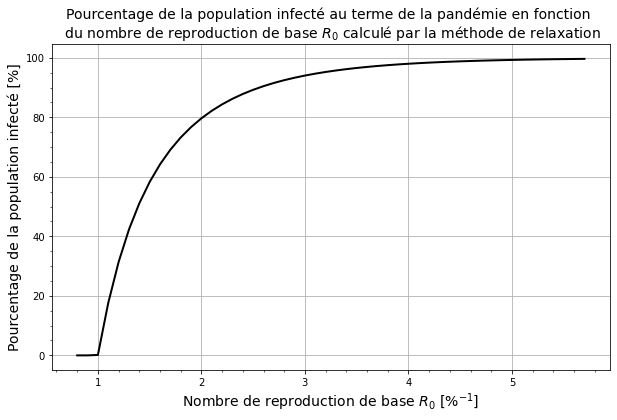

In [12]:
min_R0 = 0.8
max_R0 = 5.7
step = 0.1

def plot_pop_percentage_R0(min_R0,max_R0,step):
    """
    Évalue le pourcentage de population infecté pour une plage de nombre de reproduction de base
    et trace le graphique correspondant.
    
    Parameters
    ----------
    min_R0: valeur du nombre de reproduction de base minimal à évaluer [%$^{-1}$] (float)
    max_R0: valeur du nombre de reproduction de base maximal à évaluer [%$^{-1}$] (float)
    step: valeur des incréments à tester pour l'intervalle défini par les deux autres paramètres. (float)

    Returns
    -------
    None
    """
    R0_vec = np.arange(min_R0,max_R0+step,step)
    pop = []
    for R0 in R0_vec:
        p = pop_percentage(R0)[0]
        pop.append(p)
        
    pop = 100*np.asarray(pop)    
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(R0_vec, pop, color='k', lw=2)
    ax.set_title("Pourcentage de la population infecté au terme de la pandémie en fonction \n"
                 " du nombre de reproduction de base $R_{0}$ calculé par la méthode de relaxation", fontsize=14)

    ax.set_xlabel("Nombre de reproduction de base $R_{0}$ [%$^{-1}$]", fontsize=14)
    ax.set_xlim()
    ax.set_ylabel("Pourcentage de la population infecté [%]", fontsize=14)
    ax.minorticks_on()

    plt.grid()
    plt.show()
    plt.close(fig)
    
    
plot_pop_percentage_R0(min_R0,max_R0,step)



## Pandémie et relaxation accélérée

### Question 6

### Question 7

### Question 8

### Question 9